In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tdse.propagator.polar import Propagator_on_Uniform_Grid_Polar_Box_Over_r

prop = Propagator_on_Uniform_Grid_Polar_Box_Over_r(Nr=51, dr=0.4, m_max=1, Vr=0.0)

#### Evaluate wavefunction of interest 

- by specific initialization followed by imaginary propagation

In [3]:
wf_m_plus_1 = np.zeros((prop.Nm, prop.Nr), dtype=complex)
m_for_plus_1 = 2
wf_m_plus_1[m_for_plus_1] = np.random.rand(prop.Nr)

prop.propagate_to_ground_state(wf_m_plus_1, norm_thres=1e-8)

iteration count at end: 131


In [4]:
wf_m_minus_1 = np.zeros((prop.Nm, prop.Nr), dtype=complex)
m_for_minus_1 = 0
wf_m_minus_1[m_for_minus_1] = np.random.rand(prop.Nr)

prop.propagate_to_ground_state(wf_m_minus_1, norm_thres=1e-8)

iteration count at end: 127


In [5]:
wf_m_0 = np.zeros((prop.Nm, prop.Nr), dtype=complex)
m_for_m_0 = 1
wf_m_0[m_for_m_0] = np.random.rand(prop.Nr)

prop.propagate_to_ground_state(wf_m_0, norm_thres=1e-8)

iteration count at end: 141


#### Superposition

In [6]:
# wf = wf_m_plus_1 + wf_m_minus_1
# wf = wf_m_plus_1.copy()
wf = wf_m_plus_1 + wf_m_0

prop.wf_class.normalize(wf, prop.dr)
wf_t0 = wf.copy()

#### Visualize radial functions

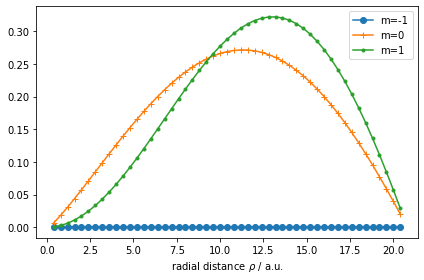

In [7]:
fig, ax = plt.subplots()
markers="o+."
for im, m in enumerate(prop.m_iter):
    ax.plot(prop.r_arr, wf[im].real, marker=markers[im%len(wf)], label='m={}'.format(m))
ax.set_xlabel(r"radial distance $\rho$ / a.u.")
ax.legend()
fig.tight_layout()
# fig.savefig("each-radial-func-for-wf-test-1.png")

# Animate wavefunction

In [8]:
%matplotlib notebook

from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


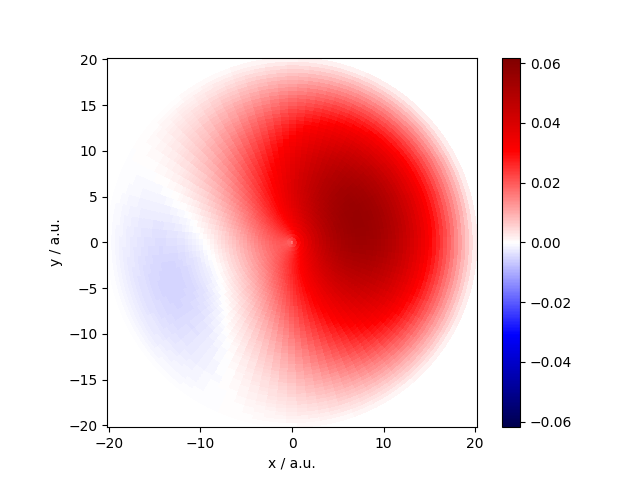

In [9]:
fig, ax = plt.subplots()

phi_arr = np.linspace(0., 2.*np.pi, 101)
from vis.plot import construct_polar_mesh_for_colormesh
r_cmesh, phi_cmesh = construct_polar_mesh_for_colormesh(prop.r_arr, phi_arr)

wf_polar = prop.wf_class.eval_at_real_space(wf, prop.dr, phi_arr)
vmax = np.abs(wf_polar).max() * 1.1

pcm = ax.pcolormesh(r_cmesh, phi_cmesh, np.zeros_like(wf_polar.transpose(), dtype=float), 
                    cmap='seismic', vmin=-vmax, vmax=vmax)

ax.set_aspect(1.0)
ax.set_xlabel("x / a.u."), ax.set_ylabel("y / a.u.")
cb = fig.colorbar(pcm, ax=ax)


def init():
    wf[:] = wf_t0
    
def update(i):
    #### Wavefunction evaluation at real space
    wf_polar = prop.wf_class.eval_at_real_space(wf, prop.dr, phi_arr)
    
    pcm.set_array(wf_polar.transpose().real.ravel())
    
    #### Propagation
    prop.propagate(wf, dt=prop.dr/4., Nt=25)


ani = FuncAnimation(fig, update, frames=20, init_func=init)

In [10]:
from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=5)
# ani.save("wf-test-2.gif", writer=writer)

# [TODO] Evaluate the energy and compare

- be careful to evaluate the energy with Numerov-boosted Hamiltonian

# [TODO] implement c-boosted version of gaussian ellimination

# Comparison with analytical expressions

In [11]:
from scipy.special import jn, jn_zeros

j0_zero_0, = jn_zeros(0, 1)
j0_r = jn(0, j0_zero_0 * prop.r_arr / prop.r_max)
g0_r_ana = prop.r_arr * j0_r
prop.wf_class.normalize(g0_r_ana, prop.dr)

j1_zero_0, = jn_zeros(1, 1)
j1_r = jn(1, j1_zero_0 * prop.r_arr / prop.r_max)
g1_r_ana = prop.r_arr * j1_r
prop.wf_class.normalize(g1_r_ana, prop.dr)


# Corresponding numerical results
g0_r_num = wf_t0[m_for_m_0].copy()
prop.wf_class.normalize(g0_r_num, prop.dr)
g1_r_num = wf_t0[m_for_plus_1].copy()
prop.wf_class.normalize(g1_r_num, prop.dr)

<IPython.core.display.Javascript object>


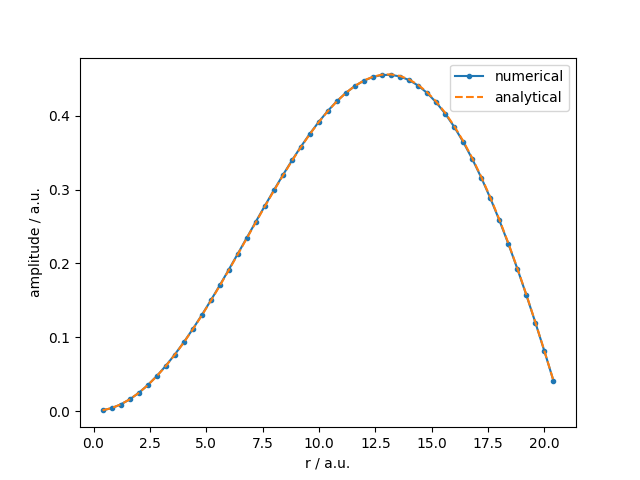

In [12]:
g_ana = g1_r_ana
g_num = g1_r_num

fig, ax = plt.subplots()

lnum, = ax.plot(prop.r_arr, g_num.real, '.-', label='numerical')
# ax.plot(prop.r_arr, np.abs(g_num), color=lnum.get_color(), linewidth=0.7)

ax.plot(prop.r_arr, g_ana, '--', label='analytical')

ax.set_xlabel("r / a.u."), ax.set_ylabel("amplitude / a.u.")
ax.legend()
# fig.savefig("ground-state-prototype-with-spilt-op-m-1-test-5.png")

# [TODO] Let's boost to match the slope at r=0 to the analytical one. What can be a proper procedure?

![ddd](ground-state-prototype-with-spilt-op-dr-0.1.png)

- let's check the .. D1 and M1 .. let's think how to change them
  - checked. but .. doesn't seem any ..